# CA-04

In [58]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

## Data Source

In [21]:
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [9]:
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


## Data Cleaning

In [4]:
## check for missing values
print(df.isnull().sum())

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64


In [22]:
split=df['flag'].unique()
print(split)

['train' 'test']


In [23]:
for value in split:
    train_data=df[df['flag']=='train']
    test_data=df[df['flag']=='test']

In [24]:
x_train = pd.get_dummies(train_data[['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin','age_bin' ]])
y_train = train_data["y"]

x_test = pd.get_dummies(test_data[['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin','age_bin' ]])
y_test = test_data["y"]

#### Feature selection using RFE

In [46]:
#RFEmodel = RandomForestClassifier()

# Create an instance of the RFE class and fit it to your training data
#rfe = RFE(RFEmodel, n_features_to_select=6)
#rfe.fit(x_train, y_train)

# Print the selected features
#print("Selected Features: ", rfe.support_)

# Extract the selected features from your original data
#x_train_rfe = x_train.iloc[:, rfe.support_]
#x_test_rfe = x_test.iloc[:, rfe.support_]

#x_train_rfe

## Finding Optimal Value of a key Ensemble Method Hyperparameter 

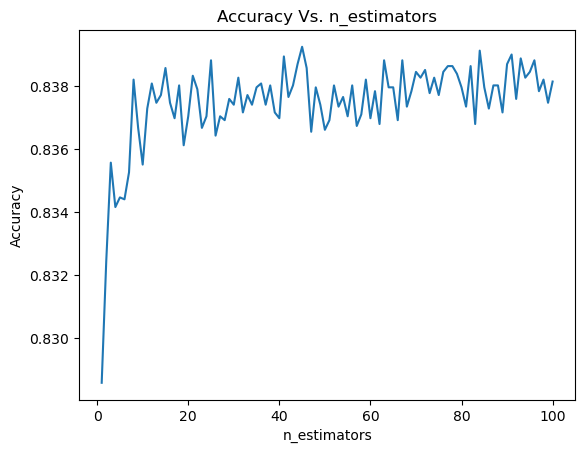

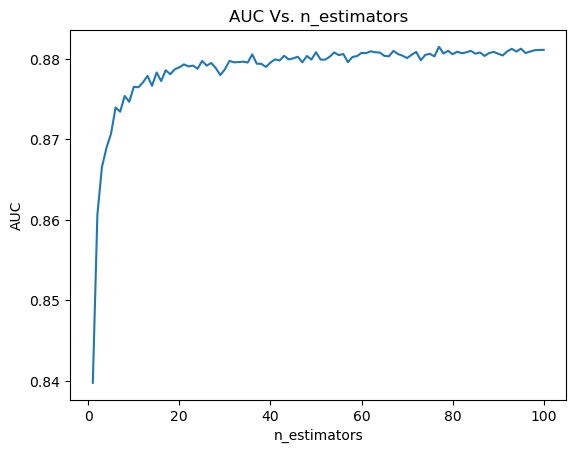

In [47]:
# Define the range of n_estimators values to test
n_estimators_range = range(1, 101)

# Initialize empty lists to store accuracy and AUC values
accuracy_scores = []
auc_scores = []

# Iterate over different values of n_estimators
for n_estimators in n_estimators_range:
    # Initialize a RandomForestClassifier with the current value of n_estimators
    model = RandomForestClassifier(n_estimators=n_estimators)
    
    # Fit the model to the training data
    model.fit(x_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(x_test)
    
    # Calculate and store the accuracy score
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
    # Calculate and store the AUC score
    y_proba = model.predict_proba(x_test)[:, 1]
    auc_scores.append(roc_auc_score(y_test, y_proba))

# Plot the accuracy scores against different values of n_estimators
plt.plot(n_estimators_range, accuracy_scores)
plt.title('Accuracy Vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

# Plot the AUC scores against different values of n_estimators
plt.plot(n_estimators_range, auc_scores)
plt.title('AUC Vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()


## Building a Random Forest Model

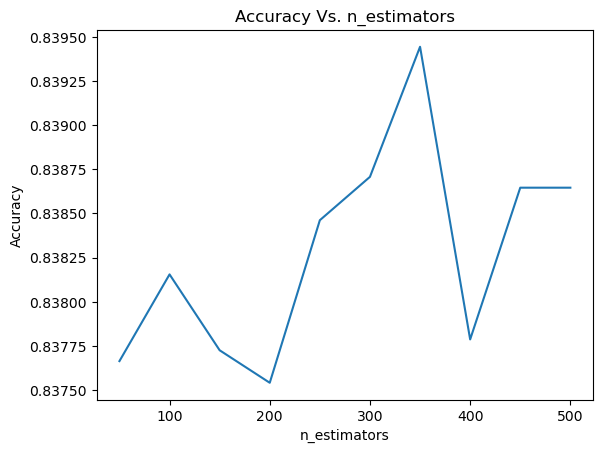

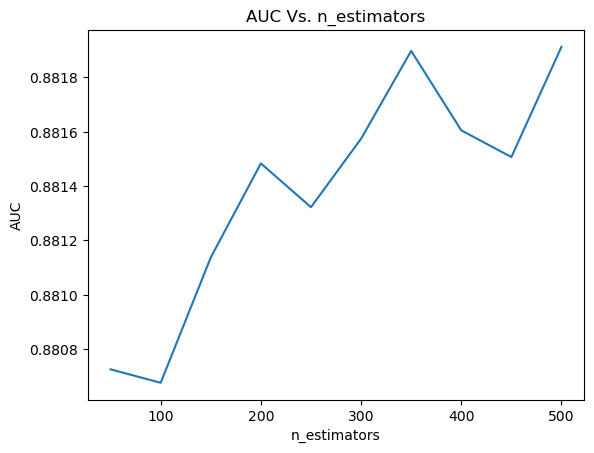

In [45]:
# Define the range of n_estimators values to test
n_estimators_range = [50,100,150,200,250,300,350,400,450,500]

# Initialize empty lists to store accuracy and AUC values
accuracy_scores = []
auc_scores = []

# Iterate over different values of n_estimators
for n_estimators in n_estimators_range:
    # Initialize a RandomForestClassifier with the current value of n_estimators
    model = RandomForestClassifier(n_estimators=n_estimators)
    
    # Fit the model to the training data
    model.fit(x_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(x_test)
    
    # Calculate and store the accuracy score
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
    # Calculate and store the AUC score
    y_proba = model.predict_proba(x_test)[:, 1]
    auc_scores.append(roc_auc_score(y_test, y_proba))

# Plot the accuracy scores against different values of n_estimators
plt.plot(n_estimators_range, accuracy_scores)
plt.title('Accuracy Vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

# Plot the AUC scores against different values of n_estimators
plt.plot(n_estimators_range, auc_scores)
plt.title('AUC Vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()



1. Write your observations about the Classifier’s behavior with respect to the number
of estimators
- For accuracy, there does not seeem to be a trend although it looks to peak around 200 estimators. With regards to AUC, the trend is upwards pearking around 450. 

2. Is there an optimal value of the estimator within the given range?
- Around 200 estimators

## Building AdaBoost, Gradient Boost, and XGB.

### AdaBoost

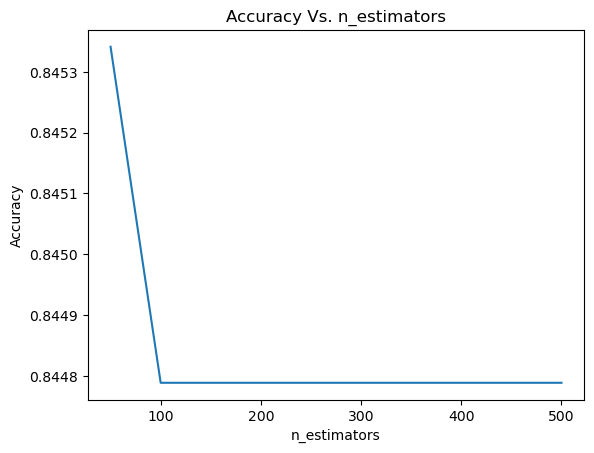

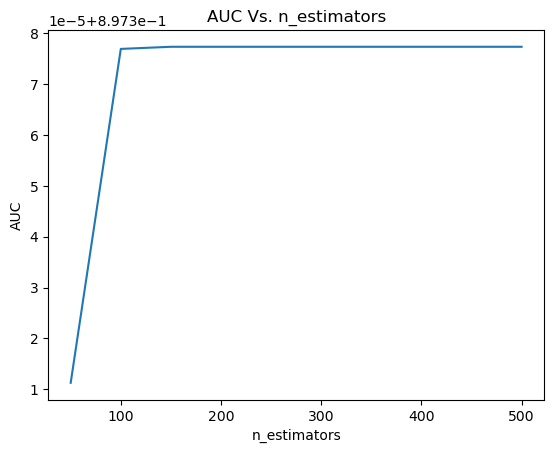

0.8461396720103188
0.7594636885596051


In [73]:
# Define the range of n_estimators values to test
n_estimators_range = [50,100,150,200,250,300,350,400,450,500]

# Initialize empty lists to store accuracy and AUC values
ada_accuracy_scores = []
ada_auc_scores = []

# Iterate over different values of n_estimators
for n_estimators in n_estimators_range:
    # Initialize a RandomForestClassifier with the current value of n_estimators
    model = AdaBoostClassifier(n_estimators=n_estimators)
    
    # Fit the model to the training data
    model.fit(x_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(x_test)
    
    # Calculate and store the accuracy score
    ada_accuracy_scores.append(accuracy_score(y_test, y_pred))
    
    # Calculate and store the AUC score
    y_proba = model.predict_proba(x_test)[:, 1]
    ada_auc_scores.append(roc_auc_score(y_test, y_proba))

# Plot the accuracy scores against different values of n_estimators
plt.plot(n_estimators_range, ada_accuracy_scores)
plt.title('Accuracy Vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

# Plot the AUC scores against different values of n_estimators
plt.plot(n_estimators_range, ada_auc_scores)
plt.title('AUC Vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

print(max(accuracy_scores))
print(max(auc_scores))

### Gradient Boost

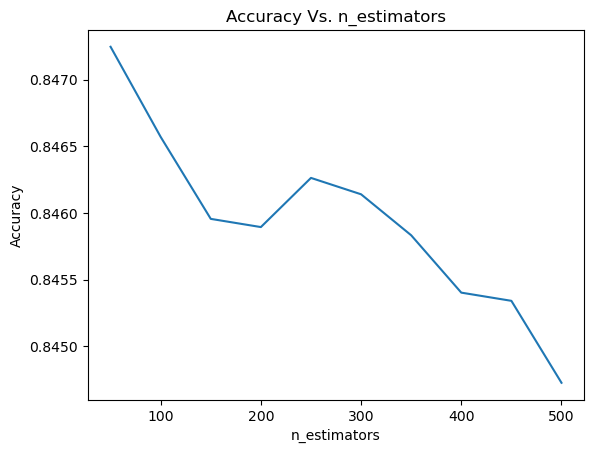

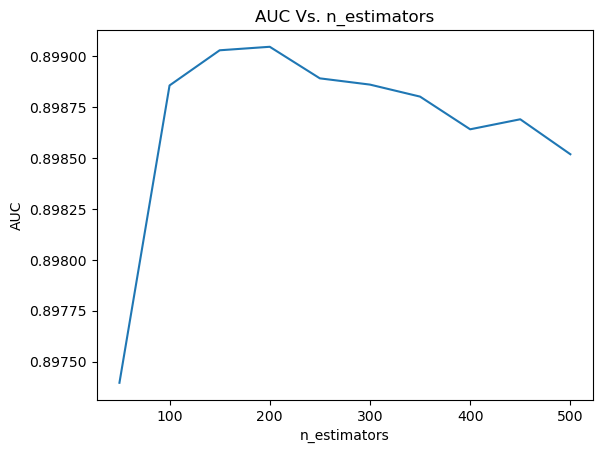

0.8461396720103188
0.7594636885596051


In [74]:
# Define the range of n_estimators values to test
n_estimators_range = [50,100,150,200,250,300,350,400,450,500]

# Initialize empty lists to store accuracy and AUC values
gb_accuracy_scores = []
gb_auc_scores = []

# Iterate over different values of n_estimators
for n_estimators in n_estimators_range:
    # Initialize a RandomForestClassifier with the current value of n_estimators
    model = GradientBoostingClassifier(n_estimators=n_estimators)
    
    # Fit the model to the training data
    model.fit(x_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(x_test)
    
    # Calculate and store the accuracy score
    gb_accuracy_scores.append(accuracy_score(y_test, y_pred))
    
    # Calculate and store the AUC score
    y_proba = model.predict_proba(x_test)[:, 1]
    gb_auc_scores.append(roc_auc_score(y_test, y_proba))

# Plot the accuracy scores against different values of n_estimators
plt.plot(n_estimators_range, gb_accuracy_scores)
plt.title('Accuracy Vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

# Plot the AUC scores against different values of n_estimators
plt.plot(n_estimators_range, gb_auc_scores)
plt.title('AUC Vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

print(max(accuracy_scores))
print(max(auc_scores))

### XGB 

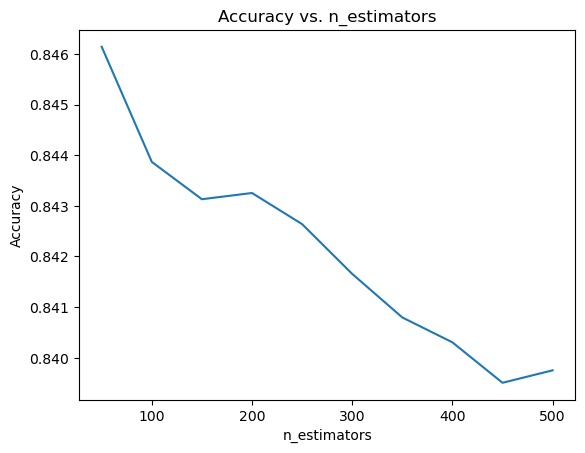

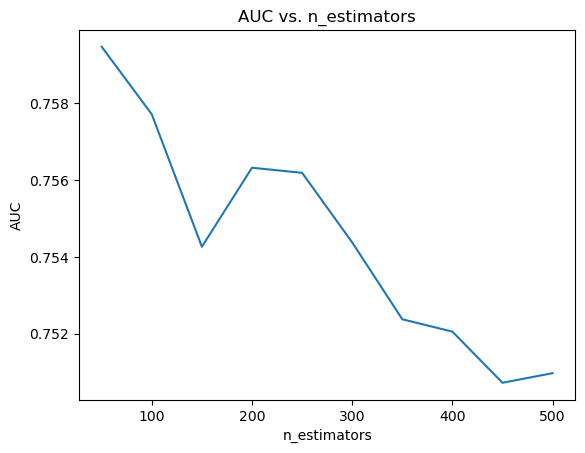

0.8461396720103188
0.7594636885596051


In [75]:
# Define the range of n_estimators values to test
n_estimators_range = [50,100,150,200,250,300,350,400,450,500]

x_train.columns = [c.replace('[','_').replace(']','_').replace('<','_') for c in x_train.columns]
x_test.columns = [c.replace('[','_').replace(']','_').replace('<','_') for c in x_test.columns]

# Initialize empty lists to store accuracy and AUC values
xgb_accuracy_scores = []
xgb_auc_scores = []

for n in n_estimators_range:
    xgb_model = xgb.XGBClassifier(n_estimators=n)
    xgb_model.fit(x_train, y_train)
    
    # Make predictions on the testing set and calculate accuracy and AUC scores
    y_pred = xgb_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    # Append accuracy and AUC scores to the respective lists
    xgb_accuracy_scores.append(accuracy)
    xgb_auc_scores.append(auc)

# Plot the Accuracy vs. n_estimator graph
plt.plot(n_estimators_range, xgb_accuracy_scores)
plt.title('Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

# Plot the AUC vs. n_estimator graph
plt.plot(n_estimators_range, xgb_auc_scores)
plt.title('AUC vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

print(max(xgb_accuracy_scores).index())
print(max(xgb_auc_scores).index())

## Compare Performance

In [83]:
df = pd.DataFrame({'Random Forest':[350,350], 'AdaBoost':[50,100], 'Gradient Boost':[100,200],'XGB':[100,100]})

In [85]:
df.index = ['Accuracy', 'AUC']

In [86]:
df

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,350,50,100,100
AUC,350,100,200,100
